In [1]:
# Imprting required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('bill_survey.csv')
df.head()

,City,Bill
0,Mumbai,15400
1,Mumbai,6700
2,Mumbai,16300
3,Mumbai,2100
4,Mumbai,4600


In [3]:
# Checking the size of the data
df.shape

(10350, 2)

In [4]:
# Getting ore information
df.describe()

,Bill
count,10350.00000
mean,5951.52657
std,4193.19317
min,100.00000
25%,2900.00000
50%,5000.00000
75%,8000.00000
max,38900.00000


In [5]:
# Number of unique cities in the data
df.City.nunique()

207

<Axes: xlabel='Bill', ylabel='Count'>

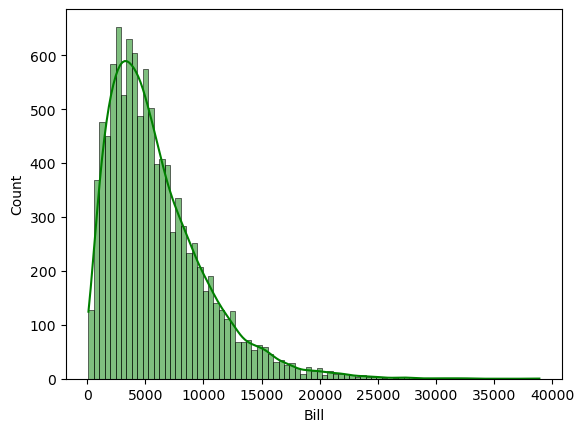

In [6]:
# Hist Plot of the bill 
sns.histplot(df.Bill, kde=True, color='green')

<Axes: xlabel='Bill', ylabel='Count'>

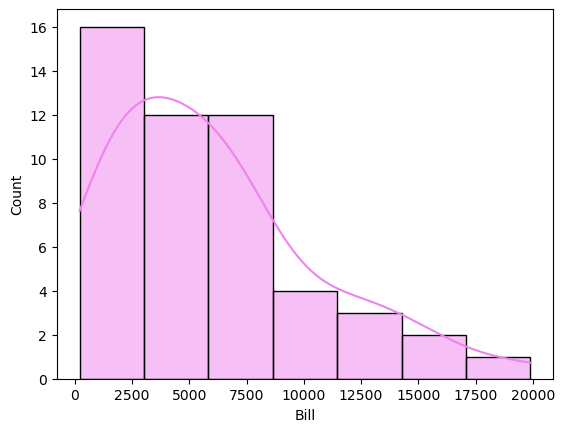

In [7]:
# Hist plot od the city=mumbai
sns.histplot(df[df.City=='Mumbai'].Bill, kde=True, color='violet')

In [8]:
# Average Bill amount per city
sample_means = []
for city, subf in df.groupby('City'):
    print(city, subf.Bill.mean())
    

Agartala 6276.0
Agra 6084.0
Ahmedabad 5990.0
Ahmednagar 5588.0
Aizawl 5680.0
Ajmer 5448.0
Akola 6426.0
Aligarh 6340.0
Allahabad 5714.0
Alwar 5630.0
Ambattur 4784.0
Ambernath 6670.0
Amravati 4738.0
Amritsar 5544.0
Anantapur 5718.0
Arrah 6334.0
Asansol 5414.0
Aurangabad 6284.0
Avadi 5130.0
Bally 5962.0
Bangalore 5582.0
Baranagar 5702.0
Barasat 5346.0
Bardhaman 6356.0
Bareilly 5944.0
Bathinda 5976.0
Begusarai 5872.0
Belgaum 6412.0
Bellary 6420.0
Bhagalpur 6082.0
Bharatpur 6298.0
Bhatpara 4968.0
Bhavnagar 6378.0
Bhilai 6698.0
Bhilwara 5856.0
Bhiwandi 5426.0
Bhopal 6438.0
Bhubaneswar 6090.0
Bihar Sharif 4978.0
Bijapur 6426.0
Bikaner 5364.0
Bilaspur 5356.0
Bokaro 5584.0
Brahmapur 6390.0
Bulandshahr 5202.0
Chandigarh 6310.0
Chandrapur 5506.0
Chennai 6476.0
Coimbatore 6300.0
Cuttack 6620.0
Darbhanga 6096.0
Davanagere 4482.0
Dehradun 6616.0
Delhi 6298.0
Dewas 5978.0
Dhanbad 5332.0
Dhule 6432.0
Durg 5518.0
Durgapur 5886.0
Eluru 6026.0
Etawah 6324.0
Faridabad 6330.0
Farrukhabad 6754.0
Firozabad 5

In [9]:
sample_means = []
for city, subf in df.groupby('City'):
    sample_means.append(subf.Bill.mean())
sample_means[:5]    

[6276.0, 6084.0, 5990.0, 5588.0, 5680.0]

In [10]:
len(sample_means)

207

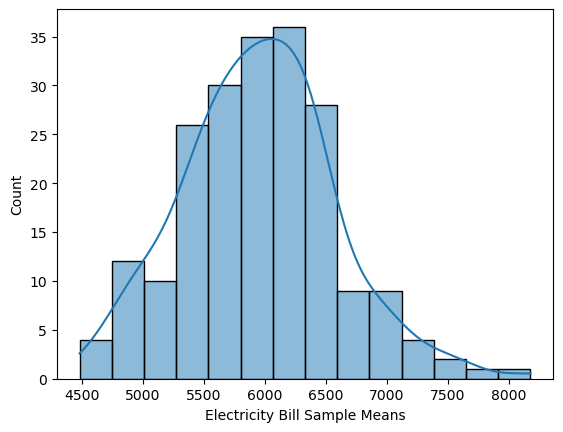

In [11]:
sns.histplot(sample_means, kde=True)

plt.xlabel("Electricity Bill Sample Means")
plt.show()

Eventhough the original distribution is right skewed, the sampling distribution is normal

### Generate a different type of distribution (not right skewed)

In [12]:
sample_size = 1000
total_samples = 2000

def get_random_sample(sample_size):
    # generate two normal distributions with means that are far apart and merge them
    mean_1, std_dev_1 = np.random.randint(100,300),  np.random.randint(20, 80)
    mean_2, std_dev_2 = np.random.randint(700,900), np.random.randint(80, 200)
    left = np.random.normal(mean_1, std_dev_1, size=(int(sample_size/2),))
    right = np.random.normal(mean_2, std_dev_2, size=(sample_size-left.shape[0],))
    data = np.append(left, right)
    return data
    
for i in range(total_samples):
    if i==0: 
        data = get_random_sample(sample_size)
    else:
        new_sample = get_random_sample(sample_size)
        data = np.vstack((data, new_sample))

data.shape

(2000, 1000)

<Axes: ylabel='Count'>

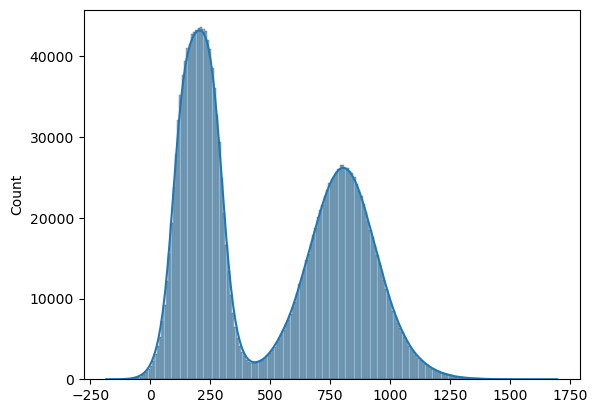

In [13]:
sns.histplot(data.flatten(), kde=True)

It looks like a random distribution as if two normal distributions are merged together. Now plot individual sample distributions

<Axes: ylabel='Count'>

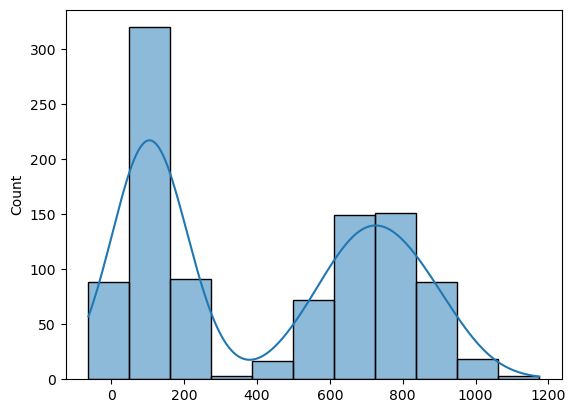

In [14]:
sns.histplot(data[0], kde=True)

<Axes: ylabel='Count'>

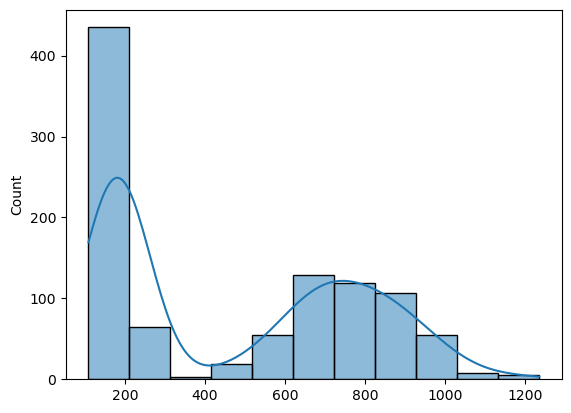

In [15]:
sns.histplot(data[1], kde=True)

### Plot sampling distribution of means now

<Axes: ylabel='Count'>

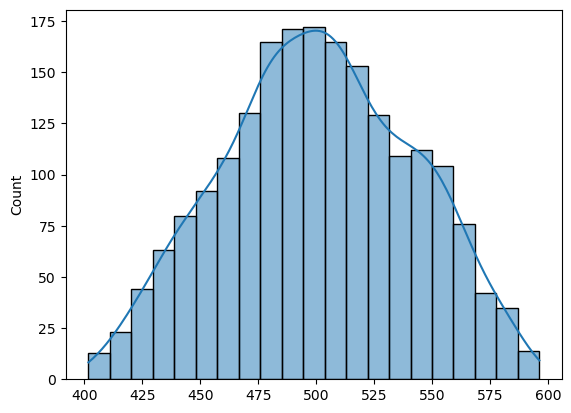

In [16]:
sample_means = []

for sample in data:
    sample_means.append(sample.mean())
    
sns.histplot(sample_means, kde=True)